<a href="https://colab.research.google.com/github/JonathanJuradoS/AprendizajeInstancias/blob/main/Aprendizaje_Basado_en_Instancias_KNN_auto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📚 Aprendizaje Basado en Instancias - Ejemplo Práctico con k-NN


## ¿Qué es el aprendizaje basado en instancias?

El aprendizaje basado en instancias es un enfoque de aprendizaje automático donde:

- No se crea un modelo explícito durante el entrenamiento.
- Las instancias se almacenan directamente y se utilizan durante la predicción.
- La predicción se realiza comparando una nueva instancia con las ya almacenadas usando una métrica de similitud o distancia.

**k-Nearest Neighbors (k-NN)** es el ejemplo clásico de este enfoque. La idea central es que las instancias similares tendrán etiquetas similares.


## 📦 Preparación de los datos

In [1]:

import pandas as pd

# Cargar el dataset generado
df = pd.read_csv("/content/dataset_clientes_gimnasio.csv")

# Mostrar las primeras filas
df.head()


,Edad,Nivel_Actividad,Tiempo_Miembro,Tipo_Cliente
0,56,0,39,Nuevo
1,46,3,44,Ocasional
2,32,4,18,Frecuente
3,60,4,31,Frecuente
4,25,6,26,Frecuente



## 🔎 Entendiendo el dataset

Este dataset simula información de clientes de un gimnasio. Las características son:

- **Edad**: Edad del cliente.
- **Nivel_Actividad**: Veces que asiste al gimnasio por semana.
- **Tiempo_Miembro**: Cuántos meses lleva inscrito.
- **Tipo_Cliente**: Etiqueta que indica si es Frecuente, Ocasional o Nuevo.

Nuestro objetivo es predecir `Tipo_Cliente`.


## 📊 Dividir datos en entrenamiento y prueba

In [2]:

from sklearn.model_selection import train_test_split

# Definir características y etiquetas
X = df[["Edad", "Nivel_Actividad", "Tiempo_Miembro"]]
y = df["Tipo_Cliente"]

# Dividir el dataset en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.head()


,Edad,Nivel_Actividad,Tiempo_Miembro
1840,42,2,21
2115,33,6,20
4437,37,0,5
1146,22,1,2
2486,42,6,58


## 🤖 Crear y entrenar el modelo k-NN

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
# Definir pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Grilla de parámetros
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],
    'knn__p': [1, 2]  # Manhattan y Euclidiana
}

# Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Evaluación final
y_pred = grid_search.best_estimator_.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
#import ace_tools as tools; tools.display_dataframe_to_user(name="Reporte de Clasificación k-NN", dataframe=report_df)
print(report_df)

# Mostrar mejores parámetros
grid_search.best_params_

              precision    recall  f1-score      support
Frecuente      0.974510  0.988072  0.981244   503.000000
Nuevo          1.000000  1.000000  1.000000   443.000000
Ocasional      0.989031  0.976534  0.982743   554.000000
accuracy       0.987333  0.987333  0.987333     0.987333
macro avg      0.987847  0.988202  0.987996  1500.000000
weighted avg   0.987401  0.987333  0.987337  1500.000000


{'knn__n_neighbors': 5, 'knn__p': 1}

## 📈 Realizar predicciones y evaluar el modelo

              precision    recall  f1-score   support

   Frecuente       0.97      0.99      0.98       503
       Nuevo       1.00      1.00      1.00       443
   Ocasional       0.99      0.98      0.98       554

    accuracy                           0.99      1500
   macro avg       0.99      0.99      0.99      1500
weighted avg       0.99      0.99      0.99      1500



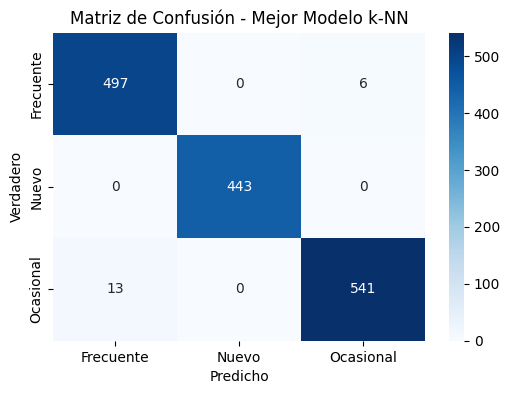

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Usar el mejor modelo encontrado por GridSearchCV
best_model = grid_search.best_estimator_

# Predecir las etiquetas del conjunto de prueba
y_pred = best_model.predict(X_test)

# Generar el reporte de clasificación
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=best_model.named_steps['knn'].classes_,
            yticklabels=best_model.named_steps['knn'].classes_)
plt.xlabel("Predicho")
plt.ylabel("Verdadero")
plt.title("Matriz de Confusión - Mejor Modelo k-NN")
plt.show()


## 🧠 Reflexión sobre Aprendizaje Basado en Instancias


Este ejemplo práctico muestra las características del aprendizaje basado en instancias:

- **No se crea un modelo explícito**: Solo se almacenan las instancias.
- **Predicción en tiempo real**: Al llegar un nuevo dato, se calcula su distancia respecto a todas las instancias.
- **Influencia directa de los datos**: Si las instancias cambian, las predicciones también lo hacen inmediatamente.
- **Flexible y simple de interpretar**: El resultado se explica directamente por las instancias vecinas.

Es una técnica efectiva para problemas de clasificación donde las relaciones son difíciles de modelar o donde se requiere alta interpretabilidad.
